In [1]:
import pandas as pd
import numpy as np
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('data_CKD_MI2.csv')

In [4]:
dataset.head()

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.8,0,1,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.8,0,2,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


In [5]:
dataset = dataset[['age','bp','al','su','bgr','bu','sc','hemo','pcv','wc','htn','appet','pe','ane','classification']]  #chi2

In [6]:
dataset

,age,bp,al,su,bgr,bu,sc,hemo,pcv,wc,htn,appet,pe,ane,classification
0,48.0,80.0,1.0,0.0,121.0,36.0,1.2,15.4,44.0,7800.0,1,0,0,0,0
1,7.0,50.0,4.0,0.0,121.0,18.0,0.8,11.3,38.0,6000.0,0,0,0,0,0
2,62.0,80.0,2.0,3.0,423.0,53.0,1.8,9.6,31.0,7500.0,0,1,0,1,0
3,48.0,70.0,4.0,0.0,117.0,56.0,3.8,11.2,32.0,6700.0,1,1,1,1,0
4,51.0,80.0,2.0,0.0,106.0,26.0,1.4,11.6,35.0,7300.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,0.0,0.0,140.0,49.0,0.5,15.7,47.0,6700.0,0,0,0,0,1
396,42.0,70.0,0.0,0.0,75.0,31.0,1.2,16.5,54.0,7800.0,0,0,0,0,1
397,12.0,80.0,0.0,0.0,100.0,26.0,0.6,15.8,49.0,6600.0,0,0,0,0,1
398,17.0,60.0,0.0,0.0,114.0,50.0,1.0,14.2,51.0,7200.0,0,0,0,0,1


In [7]:
dataset.shape

(400, 15)

In [8]:
dataset.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [9]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

array([[48., 80.,  1., ...,  0.,  0.,  0.],
       [ 7., 50.,  4., ...,  0.,  0.,  0.],
       [62., 80.,  2., ...,  1.,  0.,  1.],
       ...,
       [12., 80.,  0., ...,  0.,  0.,  0.],
       [17., 60.,  0., ...,  0.,  0.,  0.],
       [58., 80.,  0., ...,  0.,  0.,  0.]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
X_train.shape

(300, 14)

In [13]:
scaler = MinMaxScaler()

In [14]:
X_test.shape

(100, 14)

In [15]:
y_test.shape

(100,)

In [ ]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [16]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
# # Reshaping X_train for efficient modelling
# X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [17]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
#from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [18]:
import time
start_time = time.time()
#build the model
# sequential
#3 layers firtst 2 nurons and relu function
#output layer 10 nuron softmax function
model = Sequential()
model.add(keras.layers.Dense (15,input_shape=(X_train.shape[1],),activation='relu')) #input layer
model.add(keras.layers.Dense (10,activation='relu')) #hidden
model.add(keras.layers.Dense (1,activation='sigmoid')) #output
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 0.6814 - accuracy: 0.5100 - val_loss: 0.6563 - val_accuracy: 0.5900
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6498 - accuracy: 0.5900 - val_loss: 0.6243 - val_accuracy: 0.6500
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6213 - accuracy: 0.6167 - val_loss: 0.5941 - val_accuracy: 0.6500
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5941 - accuracy: 0.6167 - val_loss: 0.5641 - val_accuracy: 0.6500
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5665 - accuracy: 0.6167 - val_loss: 0.5329 - val_accuracy: 0.6500
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5368 - accuracy: 0.6200 - val_loss: 0.5015 - val_accuracy: 0.7000
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5082 - accuracy: 0.6833 - val_loss: 0.4694 - val_accuracy: 0.7900
Epoch 8/100


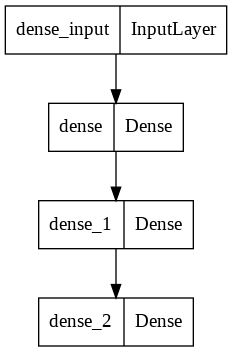

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_ann_Boruta.png')

In [ ]:
from google.colab import files
files.download('model_plot_ann_Boruta.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

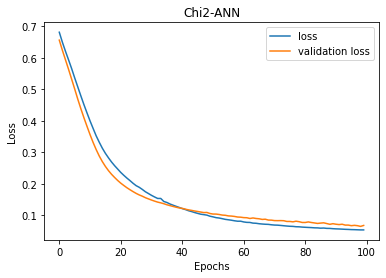

In [19]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Chi2-ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('Chi2-ANN.png', dpi=100)

In [20]:
from google.colab import files
files.download('Chi2-ANN.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 3ms/step


In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        65
           1       0.95      1.00      0.97        35

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [24]:
print(confusion_matrix(y_test,predictions))

[[63  2]
 [ 0 35]]


In [25]:
cnf_matrix = [[63, 2],[0, 35]]

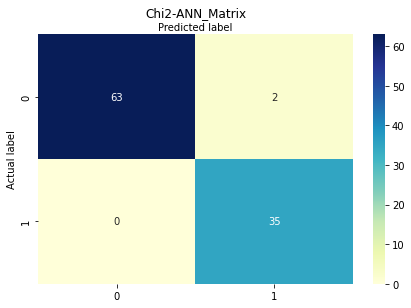

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Chi2-ANN_Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Chi2-ANN_Matrix.png')
plt.show()

In [27]:
from google.colab import files
files.download('Chi2-ANN_Matrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()

In [ ]:
df.to_csv('ann_Boruta_output.csv', index=False)

In [ ]:
# from google.colab import files
# files.download('ann_Boruta_output.csv') 